In [387]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [388]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [389]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [390]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [391]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [392]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [393]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [394]:
from matplotlib import pyplot as plt
import seaborn as sns

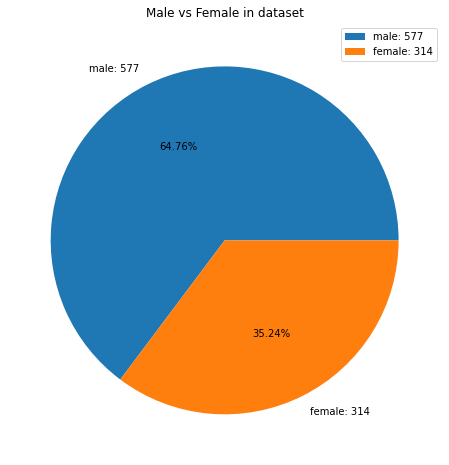

In [395]:
female = train_data['Sex'].value_counts()[1]
male = train_data['Sex'].value_counts()[0]
plt.figure(figsize=(8, 8))
plt.pie([male, female],labels=['male: '+str(male), 'female: '+str(female)], autopct="%.2f%%")
plt.title("Male vs Female in dataset")
plt.legend()
plt.show()

****

# ****Destribution****

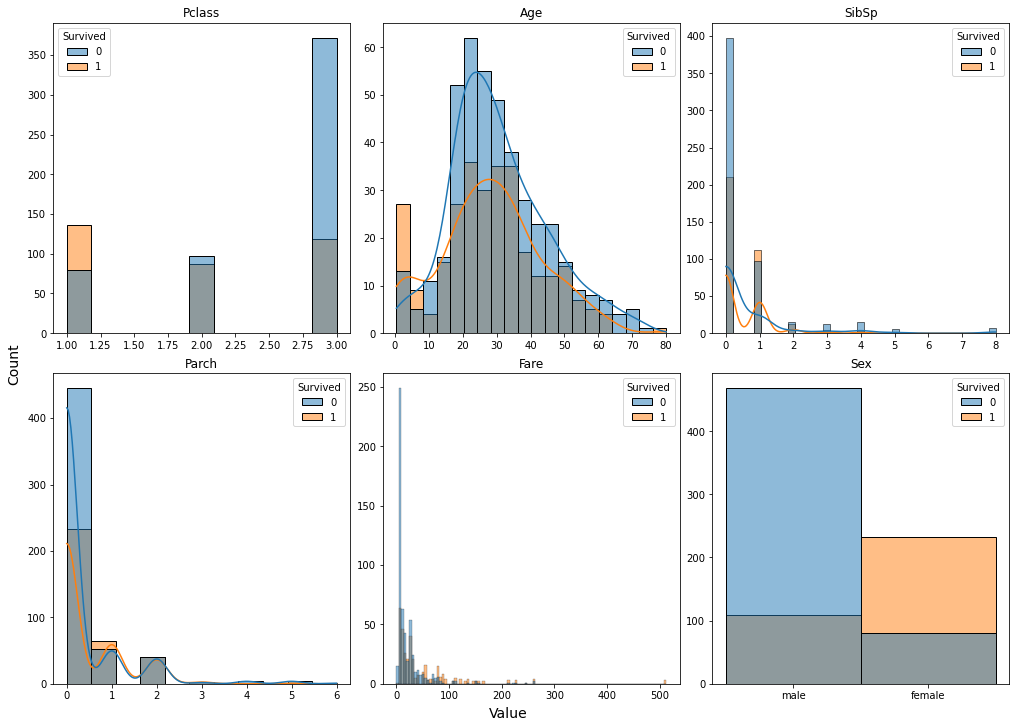

In [396]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10), constrained_layout=True)
index = []
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
for i in range(2):
    for j in range(3):
        index.append(axs[i][j])
for i in range(len(cols)):
    if i == 1 or i == 2 or i == 3:
        sns.histplot(
            data=train_data, x=cols[i], kde=True, ax=index[i], hue=train_data.columns[1]
        ).set(title=cols[i], xlabel=None, ylabel=None)
    else:
        sns.histplot(
            data=train_data, x=cols[i], kde=False, ax=index[i], hue=train_data.columns[1]
        ).set(title=cols[i], xlabel=None, ylabel=None)

fig.supxlabel("Value").set_fontsize(14)
fig.supylabel("Count").set_fontsize(14)

In [397]:
from copy import deepcopy

In [398]:
data = deepcopy(train_data)

In [399]:
# If sex = male then mark 1, else (female) mark 0
def sex_mark(data):
    data['Sex'] = data['Sex'].where(data['Sex']=='male',0)
    data['Sex'] = data['Sex'].where(data['Sex']==0,1)
    return data

In [400]:
# Fitting the null values in the Age and the Fare with the mean.
def fit_age_fare(data):
    cols = ['Age', 'Fare']
    for col in cols:
        data[col] = data[col].fillna(data[col].mean())
    data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)
    return data

In [401]:
def tick(ticket):
    if ticket.isnumeric():
        return 1
    else:
        return 0

In [402]:
def transf_name(name):
    tok = name.split(',')
    tok = tok[1].split('.')[0]
    return tok

In [403]:
def transf_cabin(cabin):
    if str(cabin) == 'nan':
        return 'NA'
    else:
        return str(cabin)[0]

In [404]:
def transform_data(data):
    data = sex_mark(data)
    data = fit_age_fare(data)
    data['Ticket_type'] = data.Ticket.apply(tick)
    data['Status'] = data.Name.apply(transf_name)
    data['Cabin_type'] = data.Cabin.apply(transf_cabin)
    data = data.drop(['Name', 'Ticket', 'Cabin','PassengerId'],axis=1)
    return data

In [405]:
data = transform_data(data)

In [406]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_type,Status,Cabin_type
0,0,3,1,22.000000,1,0,7.2500,S,0,Mr,NA
1,1,1,0,38.000000,1,0,71.2833,C,0,Mrs,C
2,1,3,0,26.000000,0,0,7.9250,S,0,Miss,NA
3,1,1,0,35.000000,1,0,53.1000,S,1,Mrs,C
4,0,3,1,35.000000,0,0,8.0500,S,1,Mr,NA
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,1,Rev,NA
887,1,1,0,19.000000,0,0,30.0000,S,1,Miss,B
888,0,3,0,29.699118,1,2,23.4500,S,0,Miss,NA
889,1,1,1,26.000000,0,0,30.0000,C,1,Mr,C


In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Ticket_type  891 non-null    int64  
 9   Status       891 non-null    object 
 10  Cabin_type   891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [408]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_type
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.741863
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.437855
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [409]:
data.corrwith(data.Survived)

Survived       1.000000
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Ticket_type    0.001492
dtype: float64

In [410]:
X = data.drop(['Survived','Ticket_type'],axis=1)
y = data['Survived']

In [411]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Status,Cabin_type
0,3,1,22.000000,1,0,7.2500,S,Mr,NA
1,1,0,38.000000,1,0,71.2833,C,Mrs,C
2,3,0,26.000000,0,0,7.9250,S,Miss,NA
3,1,0,35.000000,1,0,53.1000,S,Mrs,C
4,3,1,35.000000,0,0,8.0500,S,Mr,NA
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,S,Rev,NA
887,1,0,19.000000,0,0,30.0000,S,Miss,B
888,3,0,29.699118,1,2,23.4500,S,Miss,NA
889,1,1,26.000000,0,0,30.0000,C,Mr,C


In [412]:
Categorial_cols = ['Embarked','Status', 'Cabin_type']
Numeric_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare']

In [413]:
from sklearn.feature_extraction import DictVectorizer as DV

In [414]:
encoder = DV(sparse = False)
encoder.fit(X[Categorial_cols].T.to_dict().values())

DictVectorizer(sparse=False)

In [415]:
X_cat = encoder.transform(X[Categorial_cols].T.to_dict().values())

In [416]:
from sklearn.preprocessing import StandardScaler

In [417]:
Scaler = StandardScaler().fit(X[Numeric_cols])
X[Numeric_cols] = Scaler.transform(X[Numeric_cols])

In [418]:
X = np.concatenate((X[Numeric_cols],X_cat),axis=1)

In [419]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [420]:
(X_train,X_test,
 y_train,y_test) = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y) 

In [421]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [422]:
algos = [
    RandomForestClassifier(), 
    LogisticRegression(),
    DecisionTreeClassifier(),
    XGBClassifier()
        ]

df = {'Model':[], 'Accuracy score in train':[], 'Accuracy score in test': [],
      'Cros Val score':[]}

for algo in algos:
    model = algo.fit(X=X_train, y=y_train)
    proba = model.predict_proba(X_test)
    y_pred = []
    for p in proba:
        if p[0] > p[1]:
            y_pred.append(0)
        else:
            y_pred.append(1)
    df['Model'].append(str(algo)[:str(algo).find('(')])
    df["Accuracy score in test"].append(accuracy_score(y_test, y_pred))
    df["Accuracy score in train"].append(algo.score(X_train, y_train))
    df["Cros Val score"].append(cross_val_score(algo, X, y, cv=10).mean())
    
models = pd.DataFrame(df)
models

,Model,Accuracy score in train,Accuracy score in test,Cros Val score
0,RandomForestClassifier,0.987159,0.828358,0.812609
1,LogisticRegression,0.841091,0.817164,0.828315
2,DecisionTreeClassifier,0.987159,0.772388,0.783446
3,XGBClassifier,0.979133,0.787313,0.810412


 **The best algoritms is RandomForestClassifier**

**Lets test our model on the test data**

In [423]:
test_data = deepcopy(test_data)

In [424]:
result = test_data['PassengerId']

In [425]:
test_data = transform_data(test_data)

In [426]:
test_data = test_data.drop([])

In [427]:
test_data = test_data.drop(['Ticket_type'],axis=1)

In [428]:
test_data_cat = encoder.transform(test_data[Categorial_cols].T.to_dict().values())
test_data[Numeric_cols] = Scaler.transform(test_data[Numeric_cols])

In [429]:
test_data_transformed = np.concatenate((test_data[Numeric_cols],test_data_cat),axis=1)

In [430]:
clf.predict(test_data_transformed)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [431]:
result = pd.DataFrame(result)

In [432]:
result['Survived'] = clf.predict(test_data_transformed)

In [433]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [438]:
result.to_csv('result.csv', index=False)